# Building Pulse Instructions

TODO

On this page, we will cover in depth the various :py:class:`qiskit.pulse.commands.Command`s available in Qiskit Pulse.

First, we will cover instructions which specify pulse _envelopes_, and then we will cover instructions which specify the modulation frequency and phase of those waveforms.

In [1]:
from qiskit.pulse import (SamplePulse, Gaussian, GaussianSquare, ConstantPulse,
                          Delay, FrameChange, Acquire)

### Pulses

There are many methods available to us for building up pulses. Let's take for example a simple Gaussian pulse (a pulse with its envelope described by a sampled Gaussian function) with an amplitude of 1, standard deviation $\sigma$ of 10, and 128 sample points.

In [2]:
amp = 1
sigma = 10
num_samples = 128

It is possible to build samples by hand use for the sampled waveform envelope.

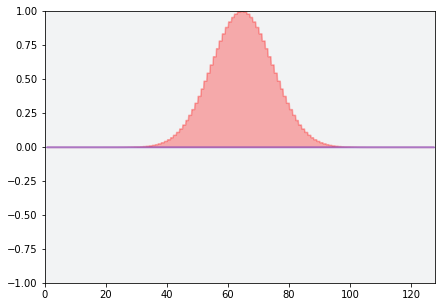

In [3]:
import numpy as np

times = np.arange(num_samples)
gaussian_samples = np.exp(-1/2 *((times - num_samples / 2) ** 2 / sigma**2))

pulse_command = SamplePulse(gaussian_samples)

pulse_command.draw()

Alternatively, you can make use of an external library.

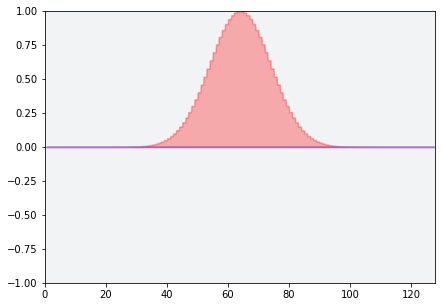

In [4]:
from scipy import signal

sampled_gaussian_envelope = signal.gaussian(num_samples, sigma)
pulse_command = SamplePulse(sampled_gaussian_envelope)

pulse_command.draw()

We have our own pulse library with helpful, common pulse waveforms.

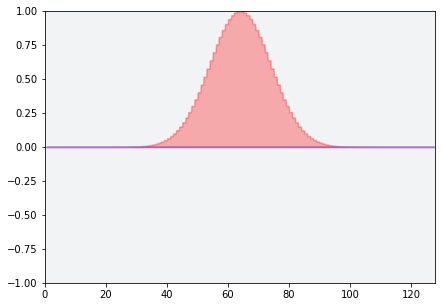

In [5]:
from qiskit.pulse import pulse_lib

pulse_command = pulse_lib.gaussian(duration=num_samples, amp=amp, sigma=sigma)

pulse_command.draw()

We have parametric pulses, as well. The backend is responsible in this case for deciding exactly how to build the parametric pulses. Using them will greatly reduce the size of the job sent to the backend.

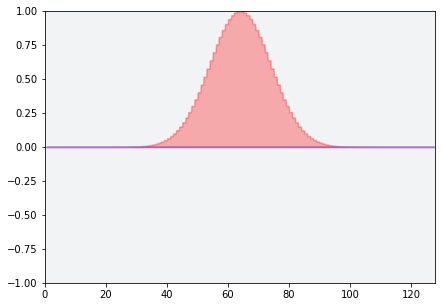

In [12]:
pulse_command = Gaussian(num_samples, amp, sigma)

pulse_command.draw()

It is possible to draw parametric pulses, but the samples displayed are not guaranteed to be the same as those on the backend. This is because a Gaussian function may be sampled in multiple ways.

### Delays

Next, we will see how to use delays. Remember that durations are in terms of `dt`.

In [17]:
delay_5dt = Delay(duration=5)

### Frame Updates

what is a frame?
frequency + phase

In [16]:
fc_2pi = FrameChange(phase=2*np.pi)  # PhaseShift

In [9]:
# frequency change: IP

Why add a FC on a derived channel?

### Acquires

In [18]:
acquire = Acquire(duration=1200)

## Commands and Instructions

In Pulse, we have "commands" and "instructions". An :py:class:`qiskit.pulse.commands.Instruction` in a Pulse program is a :py:class:`qiskit.pulse.command.Command` which has been assigned to its :py:class:`qiskit.pulse.channels.Channel`(s).

### Channels

Channels are labels for signal lines on which instructions are scheduled. `DriveChannel`s are typically used for _driving_ single qubit rotations, `ControlChannel`s are typically used for multiqubit gates (TODO), `MeasureChannel`s are specific for transmitting pulses which stimulate readout, and `AcquireChannel`s are used to trigger readout analog-to-digital converters (ADCs) to measure signals.


Let's see an example.

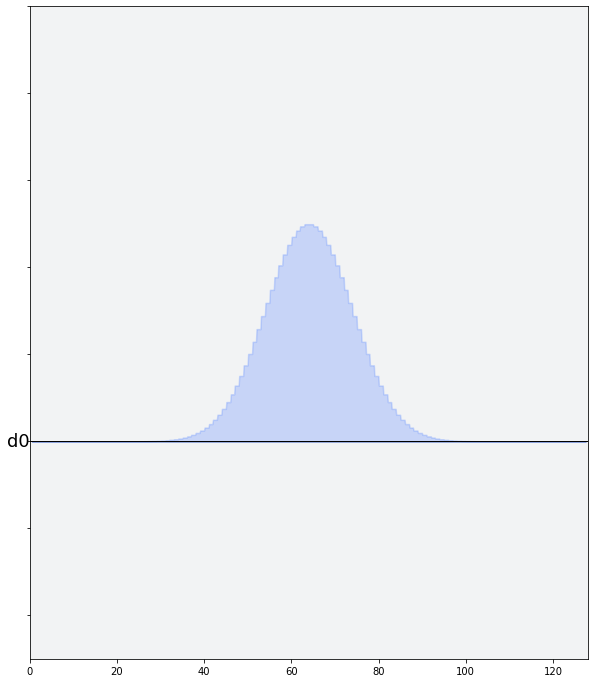

In [19]:
from qiskit.pulse import SamplePulse, DriveChannel

instruction = pulse_command(DriveChannel(0))

instruction.draw()